# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [27]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [29]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [31]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [33]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [37]:
# Extract all rows of data
#mars_table = soup.find_all('table')
#mars_df = pd.read_html(str(mars_table))[0]
#mars_df
mars_table = soup.find('table')  # Get the first table
mars_df = pd.read_html(str(mars_table))[0]  # Read the table into a DataFrame
print(mars_df)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6028\280307341.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  mars_df = pd.read_html(str(mars_table))[0]  # Read the table into a DataFrame


        id terrestrial_date   sol   ls  month  min_temp  pressure
0        2       2012-08-16    10  155      6     -75.0     739.0
1       13       2012-08-17    11  156      6     -76.0     740.0
2       24       2012-08-18    12  156      6     -76.0     741.0
3       35       2012-08-19    13  157      6     -74.0     732.0
4       46       2012-08-20    14  157      6     -74.0     740.0
...    ...              ...   ...  ...    ...       ...       ...
1862  1889       2018-02-23  1973  133      5     -78.0     730.0
1863  1892       2018-02-24  1974  134      5     -77.0     729.0
1864  1894       2018-02-25  1975  134      5     -76.0     729.0
1865  1893       2018-02-26  1976  135      5     -77.0     728.0
1866  1895       2018-02-27  1977  135      5     -77.0     727.0

[1867 rows x 7 columns]


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [39]:
# Create an empty list
mars_weather = []

# Loop through the scraped data to create a list of rows
mars_weather_table = mars_table.find_all('th')  # Use mars_table here

for header_element in mars_weather_table:
    title = header_element.text
    mars_weather.append(title)

print(mars_weather)

# Loop through the scraped data to create a list of rows


['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']


In [43]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_data = []
mars_rows = mars_table.find_all('tr')[1:]  # Skip the header row
for row in mars_rows:
    columns = row.find_all('td')  # Get all data cells in the row
    mars_data.append([column.text for column in columns])  # Append the data to the list
    mars_weather_df = pd.DataFrame(mars_data, columns=mars_weather)

In [47]:
# Confirm DataFrame was created successfully
print(mars_weather_df)

        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [53]:
# Examine data type of each column
print(mars_weather_df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [57]:
# Change data types for data analysis
mars_weather_df['id']=mars_weather_df['id'].astype(int)
mars_weather_df['terrestrial_date']=pd.to_datetime(mars_weather_df['terrestrial_date'])
mars_weather_df['sol']=mars_weather_df['sol'].astype(int)
mars_weather_df['ls']=mars_weather_df['ls'].astype(int)
mars_weather_df['month']=mars_weather_df['month'].astype(int)
mars_weather_df['min_temp']=mars_weather_df['min_temp'].astype(float)
mars_weather_df['pressure']=mars_weather_df['pressure'].astype(float)

In [59]:
# Confirm type changes were successful by examining data types again
mars_weather_df.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [61]:
# 1. How many months are there on Mars?
num_months = mars_weather_df['month'].nunique()
print(f'Number of months on Mars: {num_months}')

Number of months on Mars: 12


In [65]:
# 2. How many sols (Martian days) worth of data are there?
num_martian_days = mars_weather_df['sol'].nunique()
print(f'Number of Martian days : {num_martian_days}')

Number of Martian days : 1867


In [67]:
# 3. What is the average minimum temperature by month?
avg_min_temp_per_month = mars_weather_df.groupby('month')['min_temp'].mean()
print(avg_min_temp_per_month)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


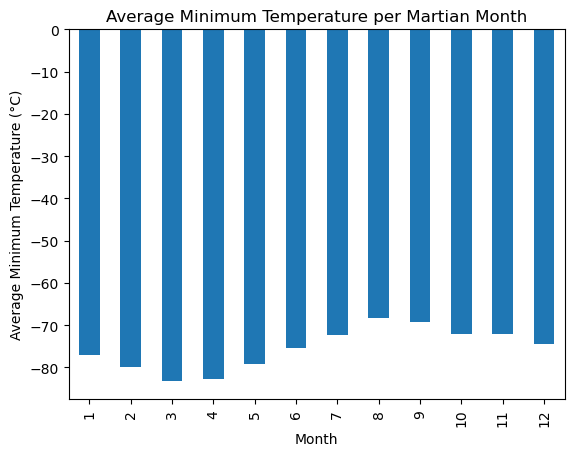

In [69]:
# Plot the average minimum temperature by month
avg_min_temp_per_month.plot(kind='bar', title='Average Minimum Temperature per Martian Month')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.show()


In [88]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
sorted_avg_min_temp = avg_min_temp_per_month.sort_values()
coldest_month = sorted_avg_min_temp.index[0]
coldest_temp = sorted_avg_min_temp.iloc[0]
hottest_month = sorted_avg_min_temp.index[-1]
hottest_temp = sorted_avg_min_temp.iloc[-1]
print(f'Coldest month: {coldest_month} with an average minimum temperature of {coldest_temp} °C')
print(f'Hottest month: {hottest_month} with an average minimum temperature of {hottest_temp} °C')

Coldest month: 3 with an average minimum temperature of -83.30729166666667 °C
Hottest month: 8 with an average minimum temperature of -68.38297872340425 °C


In [75]:
# 4. What is the average pressure by month?
avg_pressure_per_month = mars_weather_df.groupby('month')['pressure'].mean()
print(avg_pressure_per_month)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


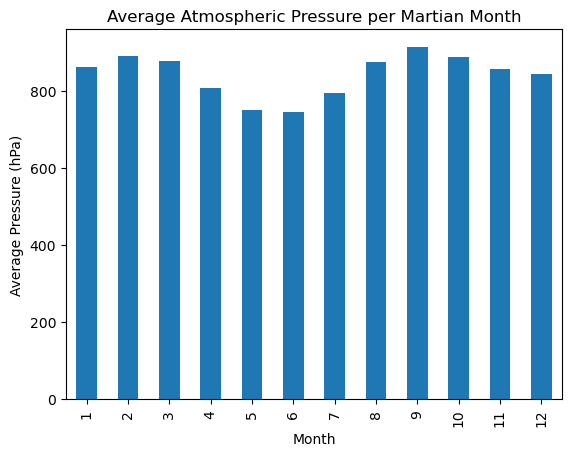

In [77]:
# Plot the average pressure by month
avg_pressure_per_month.plot(kind='bar', title='Average Atmospheric Pressure per Martian Month')
plt.xlabel('Month')
plt.ylabel('Average Pressure (hPa)')
plt.show()

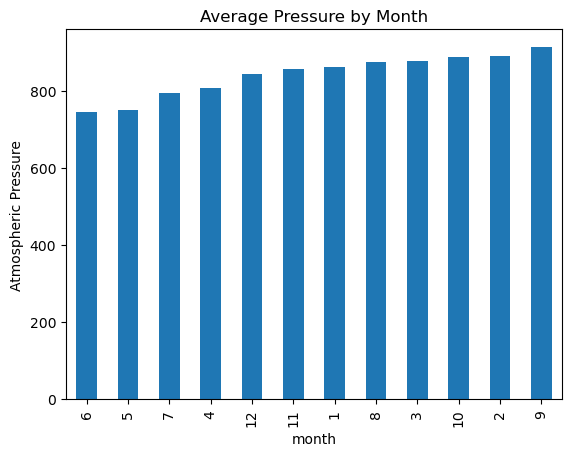

In [19]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph


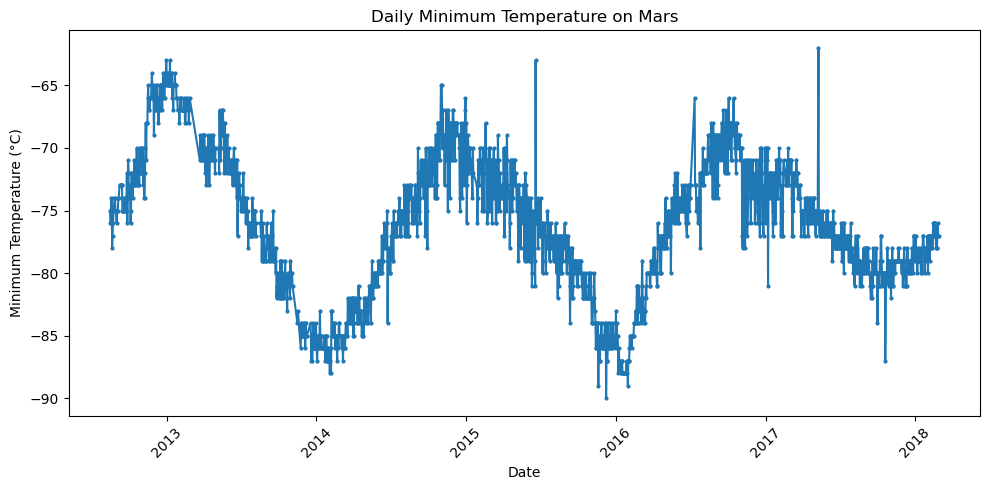

In [83]:
# 5. How many terrestrial (Earth) days are there in a Martian year?

# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
plt.figure(figsize=(10, 5))
plt.plot(mars_weather_df['terrestrial_date'], mars_weather_df['min_temp'], marker='o', linestyle='-', markersize=2)
plt.title('Daily Minimum Temperature on Mars')
plt.xlabel('Date')
plt.ylabel('Minimum Temperature (°C)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Atmospheric Pressure

YOUR ANALYSIS HERE

#### Year Length

YOUR ANALYSIS HERE

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [21]:
# Write the data to a CSV


In [22]:
browser.quit()